In [1]:
# make sure you've got the following packages installed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

In [2]:
# generate some data with noise
x = np.sort(np.random.uniform(0, 10, 15))
y = 3 + 0.2 * x + 0.1 * np.random.randn(len(x))

In [3]:
# find L1 line fit
l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
xopt1 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))

# find L2 line fit
l2_fit = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
xopt2 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))

Optimization terminated successfully.
         Current function value: 1.095024
         Iterations: 63
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: 0.143135
         Iterations: 46
         Function evaluations: 88


In [4]:
# adjust data by adding outlyers
y2 = y.copy()
y2[3] += 4
y2[13] -= 3

# refit the lines
xopt12 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y2))
xopt22 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y2))

Optimization terminated successfully.
         Current function value: 7.830157
         Iterations: 66
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 20.066564
         Iterations: 50
         Function evaluations: 97


In [5]:
# sum of two sinusoids
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

In [6]:
# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

In [29]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]

# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 2))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

C:\Users\Danny\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:781: RuntimeWarning: overflow encountered in long_scalars
  if self.max_big_small_squared < big*small**2:
C:\Users\Danny\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:782: RuntimeWarning: overflow encountered in long_scalars
  self.max_big_small_squared = big*small**2



ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +3e+03  1e-01  3e-06  1e+00  1e+03    ---    ---    1  1  - |  -  - 
 1  +1.903e-01  +3.296e-01  +5e+01  2e-03  5e-08  2e-01  2e+01  0.9826  1e-04   3  2  2 |  0  0
 2  +1.443e+01  +1.502e+01  +7e+00  3e-04  6e-09  6e-01  4e+00  0.8767  3e-02   4  5  5 |  0  0
 3  +2.160e+01  +2.162e+01  +2e-01  7e-06  7e-11  3e-02  1e-01  0.9890  2e-03   4  5  5 |  0  0
 4  +2.181e+01  +2.181e+01  +2e-03  2e-07  1e-12  3e-04  1e-03  0.9890  1e-04   4  4  4 |  0  0
 5  +2.181e+01  +2.181e+01  +2e-05  3e-09  2e-14  3e-06  1e-05  0.9890  1e-04   4  3  3 |  0  0
 6  +2.181e+01  +2.181e+01  +2e-07  6e-11  3e-16  4e-08  1e-07  0.9890  1e-04   4  3  3 |  0  0
 7  +2.181e+01  +2.181e+01  +3e-09  2e-12  2e-17  4e-10  2e-09  0.9890  1e-04   4  2  2 |  0  0

OPTIMAL (within feastol=1.9e-12, reltol=1.3e-

In [30]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

(0, 0.025)

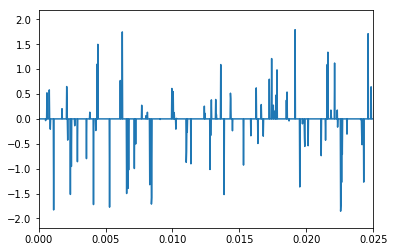

In [31]:
plt.plot(t,sig)
plt.xlim((0,0.025))